In [1]:
# Masoud Pourghavam
# Student Number: 810601044
# Course: Artificial Intelligence
# University of Tehran
# Homework 5 CNN

In [2]:
# Import the neccessary modules
import numpy as np 
import pandas as pd 
import keras
import cv2
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image
from keras.layers import Dense, Flatten
from tensorflow.keras.preprocessing import image
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation, AveragePooling2D
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential, load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential

In [3]:
My_path = r'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark'

data = []

labels = []

classes = 43

# Configuration of images
for i in range(classes):
    path = os.path.join(My_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30)) # Resize the images
            image = np.array(image)
            data.append([image,i]) # Append the values together 

In [4]:
random.shuffle(data)
print(len(data))

39209


In [5]:
x = []
y = []

for features,label in data:
    x.append(features)
    y.append(label)

In [6]:
#Converting lists into numpy arrays
x = np.array(x)
y = np.array(y)

In [7]:
# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.1, random_state=42)

print("Train set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)

Train set shape: (35288, 30, 30, 3)
Validation set shape: (3921, 30, 30, 3)


In [8]:
X_train = X_train/255.0
X_val = X_val/255.0

print("Shape of train images is:", X_train.shape)
print("Shape of labels is:", y_train.shape)

Shape of train images is: (35288, 30, 30, 3)
Shape of labels is: (35288,)


In [9]:
# Define the model with MaxPooling2D
model_maxpool = Sequential()
model_maxpool.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model_maxpool.add(MaxPooling2D(pool_size=(2, 2)))
model_maxpool.add(Conv2D(64, (3, 3), activation='relu'))
model_maxpool.add(MaxPooling2D(pool_size=(2, 2)))
model_maxpool.add(Flatten())
model_maxpool.add(Dense(128, activation='relu'))
model_maxpool.add(Dense(classes, activation='softmax'))

# Compile the model
model_maxpool.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



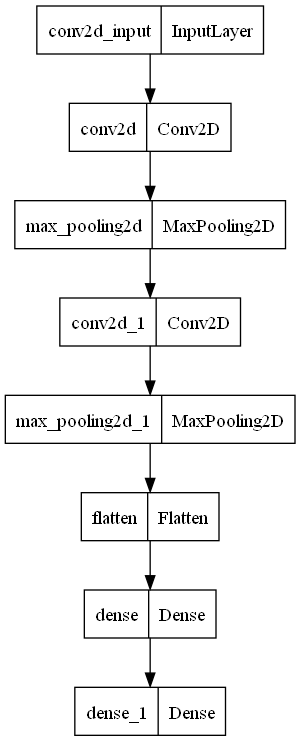

In [10]:
# The model visualization
keras.utils.plot_model(model_maxpool)

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_15 (Flatten)        (None, 2304)              0         
                                                                 
 dense_30 (Dense)            (None, 128)             

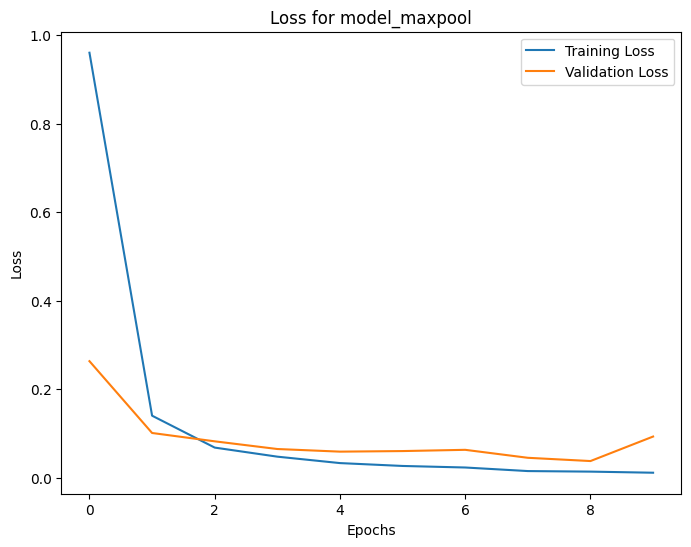

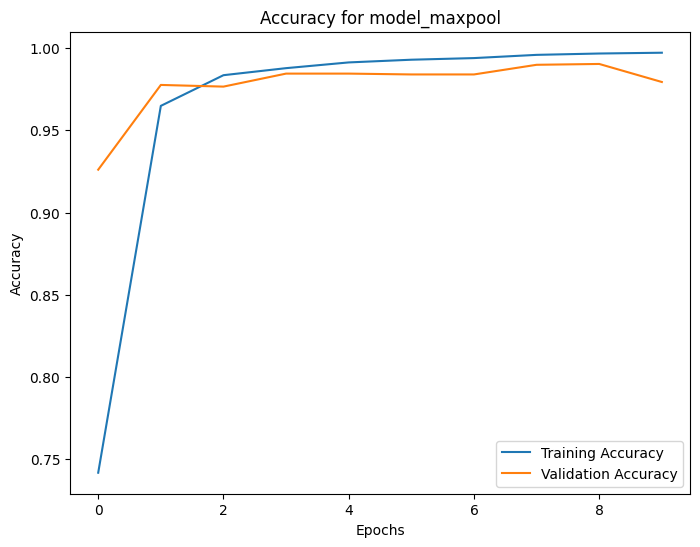

123/123 [==============================] - 1s 10ms/step
Accuracy on the test dataset for model_maxpool: 0.9184481393507522
Accuracy on the validation dataset for model_maxpool: 0.9793420045906657
395/395 [==============================] - 4s 10ms/step - loss: 0.4431 - accuracy: 0.9184
Loss on the test dataset for model_maxpool: [0.4431375563144684, 0.9184481501579285]
123/123 [==============================] - 1s 10ms/step - loss: 0.0928 - accuracy: 0.9793
Loss on the validation dataset for model_maxpool: [0.09277450293302536, 0.979341983795166]
Confusion matrix for validation data for _maxpool:
[[ 19   0   0 ...   0   0   0]
 [  0 220   1 ...   0   0   0]
 [  0   1 244 ...   0   0   0]
 ...
 [  0   1   0 ...  40   0   0]
 [  0   1   0 ...   0  23   0]
 [  0   0   0 ...   0   0  26]]

Confusion matrix for test data for _maxpool:
[[ 58   2   0 ...   0   0   0]
 [  4 709   6 ...   0   0   0]
 [  0  25 709 ...   0   0   0]
 ...
 [  0   0   0 ...  87   0   0]
 [  0   0   0 ...   0  48   0]

In [218]:
'''

# Print the model summary
model_maxpool.summary()

# Train the model with maxpool
history_maxpool = model_maxpool.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history_maxpool.history['loss'], label='Training Loss')
plt.plot(history_maxpool.history['val_loss'], label='Validation Loss')
plt.title('Loss for model_maxpool')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_maxpool.history['accuracy'], label='Training Accuracy')
plt.plot(history_maxpool.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for model_maxpool')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred_maxpool = np.argmax(model_maxpool.predict(X_test), axis=-1)

# Make predictions for validation data
val_pred_maxpool = np.argmax(model_maxpool.predict(X_val), axis=-1)

# Calculate accuracy for test
accuracy_test_maxpool = accuracy_score(labels, test_pred_maxpool)
print("Accuracy on the test dataset for model_maxpool:", accuracy_test_maxpool)

# Calculate accuracy for validation
accuracy_val_maxpool = accuracy_score(y_val, val_pred_maxpool)
print("Accuracy on the validation dataset for model_maxpool:", accuracy_val_maxpool)

# Calculate loss for test
loss_test = model_maxpool.evaluate(X_test, labels)
print("Loss on the test dataset for model_maxpool:", loss_test)

# Calculate loss for validation
loss_val = model_maxpool.evaluate(X_val, y_val)
print("Loss on the validation dataset for model_maxpool:", loss_val)

# Create confusion matrix for validation data
val_cm_maxpool = confusion_matrix(y_val, val_pred_maxpool)

# Create confusion matrix for test data
test_cm_maxpool = confusion_matrix(labels, test_pred_maxpool)

print("Confusion matrix for validation data for _maxpool:")
print(val_cm_maxpool)
print()

print("Confusion matrix for test data for _maxpool:")
print(test_cm_maxpool)

'''


In [13]:
# Define the model with AveragePooling2D
model_avgpool = Sequential()
model_avgpool.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model_avgpool.add(AveragePooling2D(pool_size=(2, 2)))
model_avgpool.add(Conv2D(64, (3, 3), activation='relu'))
model_avgpool.add(AveragePooling2D(pool_size=(2, 2)))
model_avgpool.add(Flatten())
model_avgpool.add(Dense(128, activation='relu'))
model_avgpool.add(Dense(classes, activation='softmax'))

# Compile the model
model_avgpool.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

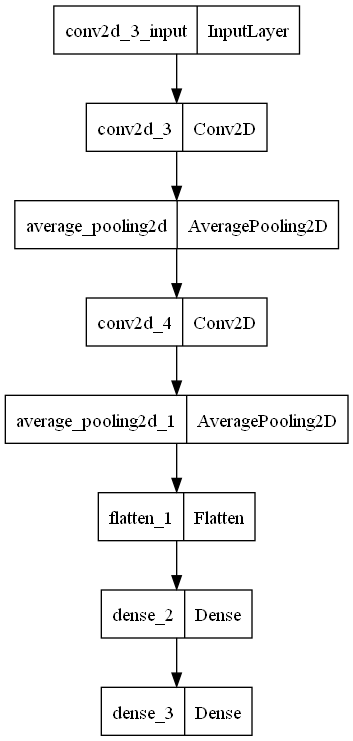

In [14]:
# The model visualization
keras.utils.plot_model(model_avgpool)

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 32)       0         
 ePooling2D)                                                     
                                                                 
 conv2d_33 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 average_pooling2d_3 (Averag  (None, 6, 6, 64)         0         
 ePooling2D)                                                     
                                                                 
 flatten_16 (Flatten)        (None, 2304)              0         
                                                                 
 dense_32 (Dense)            (None, 128)             

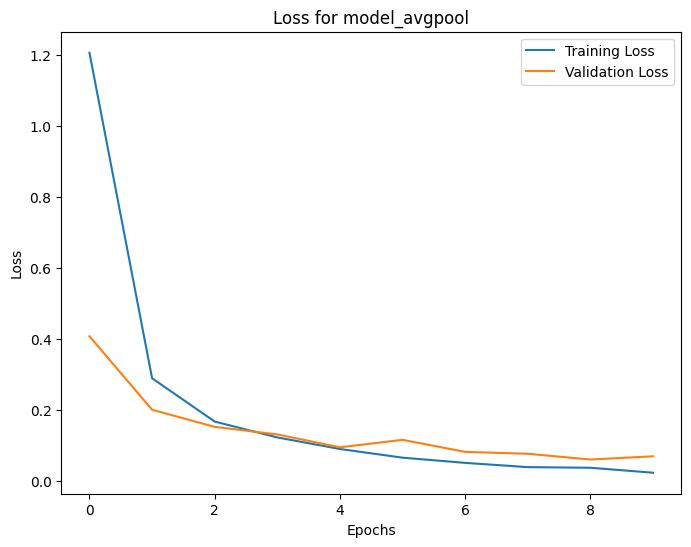

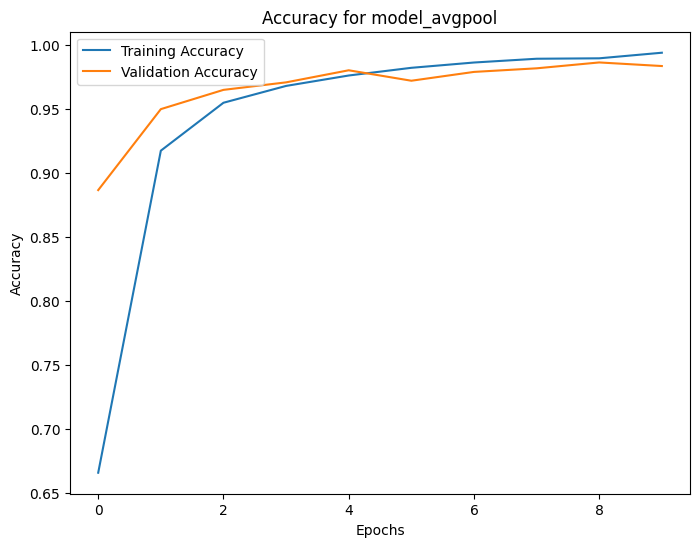

123/123 [==============================] - 1s 11ms/step
Accuracy on the test dataset for model_avgpool: 0.9043547110055423
Accuracy on the validation dataset for model_avgpool: 0.9834225962764601
395/395 [==============================] - 5s 11ms/step - loss: 0.6057 - accuracy: 0.9044
Loss on the test dataset for model_avgpool: [0.6057136654853821, 0.9043546915054321]
123/123 [==============================] - 1s 10ms/step - loss: 0.0696 - accuracy: 0.9834
Loss on the validation dataset for model_avgpool: [0.06963832676410675, 0.983422577381134]
Confusion matrix for validation data for _avgpool:
[[ 10   1   0 ...   0   0   0]
 [  0 226   2 ...   0   0   0]
 [  0   1 218 ...   0   0   0]
 ...
 [  0   0   0 ...  37   0   0]
 [  0   0   0 ...   0  31   0]
 [  0   0   0 ...   0   0  19]]

Confusion matrix for test data for _avgpool:
[[ 34  25   0 ...   0   0   0]
 [  0 703   6 ...   0   0   0]
 [  2  34 690 ...   0   0   0]
 ...
 [  0   0   0 ...  76   0   0]
 [  0   0   0 ...   0  46   0]

In [229]:
'''

# Print the model summary
model_avgpool.summary()


# Train the model with avgpool
history_avgpool = model_avgpool.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history_avgpool.history['loss'], label='Training Loss')
plt.plot(history_avgpool.history['val_loss'], label='Validation Loss')
plt.title('Loss for model_avgpool')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_avgpool.history['accuracy'], label='Training Accuracy')
plt.plot(history_avgpool.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for model_avgpool')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred_avgpool = np.argmax(model_avgpool.predict(X_test), axis=-1)

# Make predictions for validation data
val_pred_avgpool = np.argmax(model_avgpool.predict(X_val), axis=-1)

# Calculate accuracy for test
accuracy_test_avgpool = accuracy_score(labels, test_pred_avgpool)
print("Accuracy on the test dataset for model_avgpool:", accuracy_test_avgpool)

# Calculate accuracy for validation
accuracy_val_avgpool = accuracy_score(y_val, val_pred_avgpool)
print("Accuracy on the validation dataset for model_avgpool:", accuracy_val_avgpool)

# Calculate loss for test
loss_test = model_avgpool.evaluate(X_test, labels)
print("Loss on the test dataset for model_avgpool:", loss_test)

# Calculate loss for validation
loss_val = model_avgpool.evaluate(X_val, y_val)
print("Loss on the validation dataset for model_avgpool:", loss_val)

# Create confusion matrix for validation data
val_cm_avgpool = confusion_matrix(y_val, val_pred_avgpool)

# Create confusion matrix for test data
test_cm_avgpool = confusion_matrix(labels, test_pred_avgpool)

print("Confusion matrix for validation data for _avgpool:")
print(val_cm_avgpool)
print()

print("Confusion matrix for test data for _avgpool:")
print(test_cm_avgpool)

'''

In [15]:
# Define the model without Dropout
model_no_dropout = Sequential()
model_no_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model_no_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_no_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_no_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_no_dropout.add(Flatten())
model_no_dropout.add(Dense(128, activation='relu'))
model_no_dropout.add(Dense(classes, activation='softmax'))

# Compile the model
model_no_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


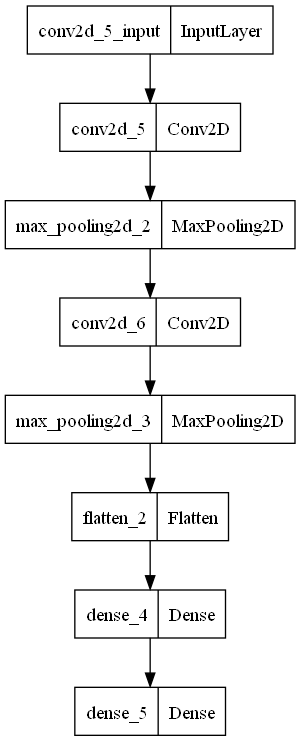

In [16]:
# The model visualization
keras.utils.plot_model(model_no_dropout)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_17 (Flatten)        (None, 2304)              0         
                                                                 
 dense_34 (Dense)            (None, 128)             

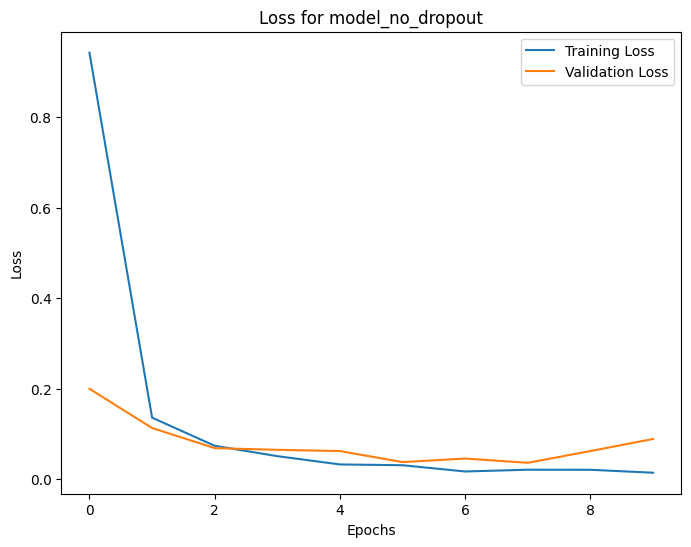

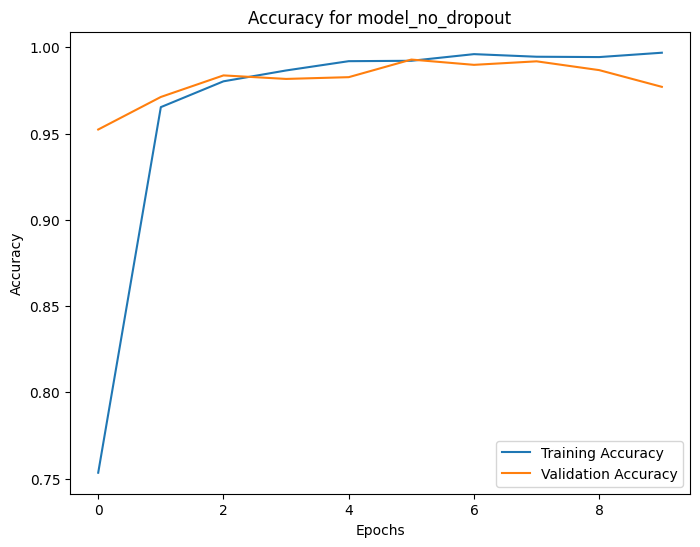

Accuracy on the test dataset for model_no_dropout: 0.9276326207442597
Accuracy on the validation dataset for model_no_dropout: 0.9770466717674062
395/395 [==============================] - 5s 11ms/step - loss: 0.3845 - accuracy: 0.9276
Loss on the test dataset for model_no_dropout: [0.38454434275627136, 0.9276326298713684]
123/123 [==============================] - 1s 11ms/step - loss: 0.0885 - accuracy: 0.9770
Loss on the validation dataset for model_no_dropout: [0.08849877119064331, 0.9770466685295105]
Confusion matrix for validation data for _no_dropout:
[[ 18   0   0 ...   0   0   0]
 [  0 229   3 ...   0   0   0]
 [  0   0 237 ...   0   0   0]
 ...
 [  0   0   0 ...  26   0   0]
 [  0   0   0 ...   0  19   0]
 [  0   0   0 ...   1   0  15]]

Confusion matrix for test data for _no_dropout:
[[ 54   2   0 ...   0   0   0]
 [  6 675  30 ...   0   0   0]
 [  0   4 738 ...   0   0   0]
 ...
 [  0   0   0 ...  88   0   0]
 [  0   0   0 ...   0  40   0]
 [  0   0   0 ...   1   0  86]]


In [240]:
'''

# Print the model summary
model_no_dropout.summary()


# Train the model with no_dropout
history_no_dropout = model_no_dropout.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history_no_dropout.history['loss'], label='Training Loss')
plt.plot(history_no_dropout.history['val_loss'], label='Validation Loss')
plt.title('Loss for model_no_dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_no_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_no_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for model_no_dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred_no_dropout = np.argmax(model_no_dropout(X_test), axis=-1)

# Make predictions for validation data
val_pred_no_dropout = np.argmax(model_no_dropout(X_val), axis=-1)

# Calculate accuracy for test
accuracy_test_no_dropout = accuracy_score(labels, test_pred_no_dropout)
print("Accuracy on the test dataset for model_no_dropout:", accuracy_test_no_dropout)

# Calculate accuracy for validation
accuracy_val_no_dropout = accuracy_score(y_val, val_pred_no_dropout)
print("Accuracy on the validation dataset for model_no_dropout:", accuracy_val_no_dropout)

# Calculate loss for test
loss_test = model_no_dropout.evaluate(X_test, labels)
print("Loss on the test dataset for model_no_dropout:", loss_test)

# Calculate loss for validation
loss_val = model_no_dropout.evaluate(X_val, y_val)
print("Loss on the validation dataset for model_no_dropout:", loss_val)

# Create confusion matrix for validation data
val_cm_no_dropout = confusion_matrix(y_val, val_pred_no_dropout)

# Create confusion matrix for test data
test_cm_no_dropout = confusion_matrix(labels, test_pred_no_dropout)

print("Confusion matrix for validation data for _no_dropout:")
print(val_cm_no_dropout)
print()

print("Confusion matrix for test data for _no_dropout:")
print(test_cm_no_dropout)

'''

In [17]:
# Define the model with Dropout
model_with_dropout = Sequential()
model_with_dropout.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model_with_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_with_dropout.add(Conv2D(64, (3, 3), activation='relu'))
model_with_dropout.add(MaxPooling2D(pool_size=(2, 2)))
model_with_dropout.add(Flatten())
model_with_dropout.add(Dense(128, activation='relu'))
model_with_dropout.add(Dropout(0.25))  # Dropout layer with dropout rate of 0.25
model_with_dropout.add(Dense(classes, activation='softmax'))

# Compile the model
model_with_dropout.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

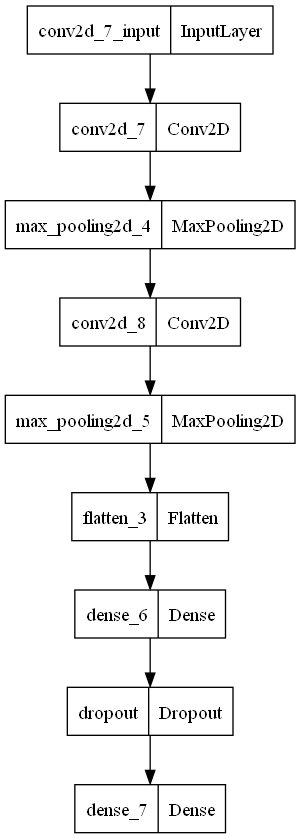

In [18]:
# The model visualization
keras.utils.plot_model(model_with_dropout)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_18 (Flatten)        (None, 2304)              0         
                                                                 
 dense_36 (Dense)            (None, 128)             

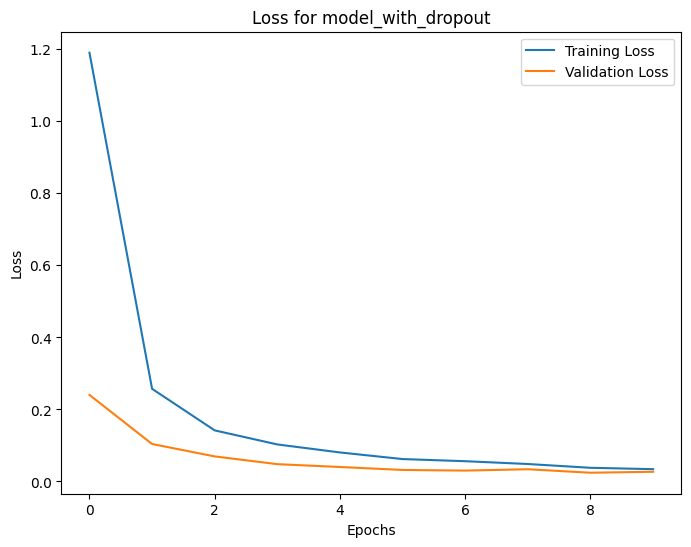

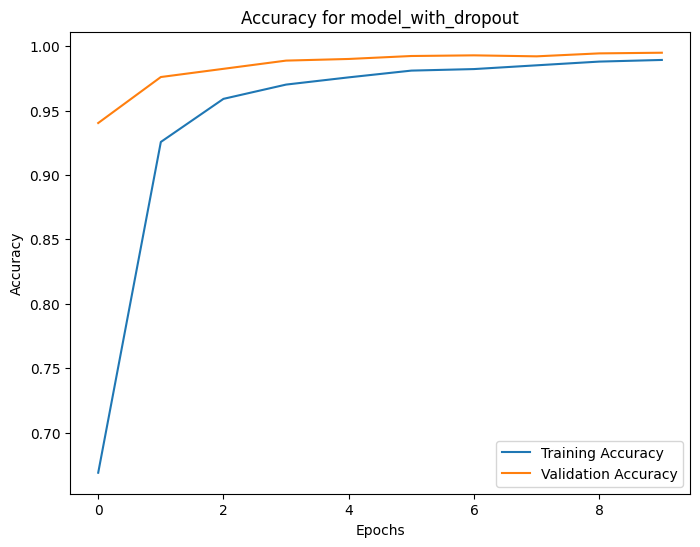

123/123 [==============================] - 2s 12ms/step
Accuracy on the test dataset for model_with_dropout: 0.9490102929532859
Accuracy on the validation dataset for model_with_dropout: 0.994899260392757
395/395 [==============================] - 4s 10ms/step - loss: 0.3076 - accuracy: 0.9490
Loss on the test dataset for model_with_dropout: [0.3076029121875763, 0.9490103125572205]
123/123 [==============================] - 1s 10ms/step - loss: 0.0269 - accuracy: 0.9949
Loss on the validation dataset for model_with_dropout: [0.026937393471598625, 0.9948992729187012]
Confusion matrix for validation data for _with_dropout:
[[ 25   0   0 ...   0   0   0]
 [  0 207   1 ...   0   0   0]
 [  0   2 216 ...   0   0   0]
 ...
 [  0   0   0 ...  36   0   0]
 [  0   0   0 ...   0  31   0]
 [  0   0   0 ...   0   0  26]]

Confusion matrix for test data for _with_dropout:
[[ 50   5   0 ...   0   0   0]
 [  0 711   4 ...   0   0   0]
 [  0  22 728 ...   0   0   0]
 ...
 [  0   0   0 ...  88   0   0]

In [251]:
'''

# Print the model summary
model_with_dropout.summary()


# Train the model with_dropout
history_with_dropout = model_with_dropout.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history_with_dropout.history['loss'], label='Training Loss')
plt.plot(history_with_dropout.history['val_loss'], label='Validation Loss')
plt.title('Loss for model_with_dropout')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_with_dropout.history['accuracy'], label='Training Accuracy')
plt.plot(history_with_dropout.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for model_with_dropout')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred_with_dropout = np.argmax(model_with_dropout.predict(X_test), axis=-1)

# Make predictions for validation data
val_pred_with_dropout = np.argmax(model_with_dropout.predict(X_val), axis=-1)

# Calculate accuracy for test
accuracy_test_with_dropout = accuracy_score(labels, test_pred_with_dropout)
print("Accuracy on the test dataset for model_with_dropout:", accuracy_test_with_dropout)

# Calculate accuracy for validation
accuracy_val_with_dropout = accuracy_score(y_val, val_pred_with_dropout)
print("Accuracy on the validation dataset for model_with_dropout:", accuracy_val_with_dropout)

# Calculate loss for test
loss_test = model_with_dropout.evaluate(X_test, labels)
print("Loss on the test dataset for model_with_dropout:", loss_test)

# Calculate loss for validation
loss_val = model_with_dropout.evaluate(X_val, y_val)
print("Loss on the validation dataset for model_with_dropout:", loss_val)

# Create confusion matrix for validation data
val_cm_with_dropout = confusion_matrix(y_val, val_pred_with_dropout)

# Create confusion matrix for test data
test_cm_with_dropout = confusion_matrix(labels, test_pred_with_dropout)

print("Confusion matrix for validation data for _with_dropout:")
print(val_cm_with_dropout)
print()

print("Confusion matrix for test data for _with_dropout:")
print(test_cm_with_dropout)

'''

In [19]:
# Define the model with Adam optimizer
model_adam = Sequential()
model_adam.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model_adam.add(MaxPooling2D(pool_size=(2, 2)))
model_adam.add(Conv2D(64, (3, 3), activation='relu'))
model_adam.add(MaxPooling2D(pool_size=(2, 2)))
model_adam.add(Flatten())
model_adam.add(Dense(128, activation='relu'))
model_adam.add(Dense(classes, activation='softmax'))

# Compile the model with Adam optimizer
model_adam.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

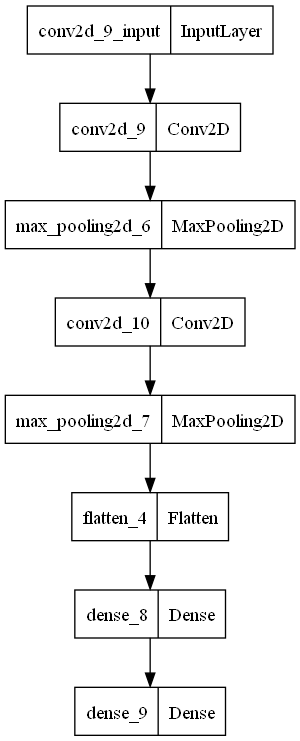

In [20]:
# The model visualization
keras.utils.plot_model(model_adam)

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_38 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_39 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_35 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_19 (Flatten)        (None, 2304)              0         
                                                                 
 dense_38 (Dense)            (None, 128)             

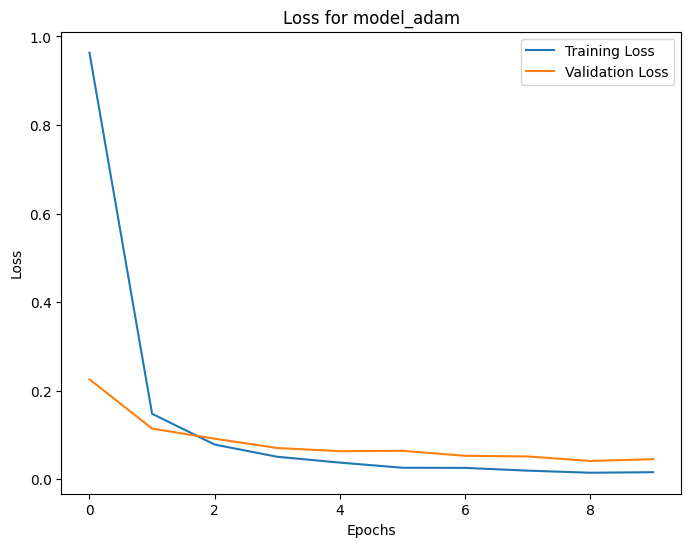

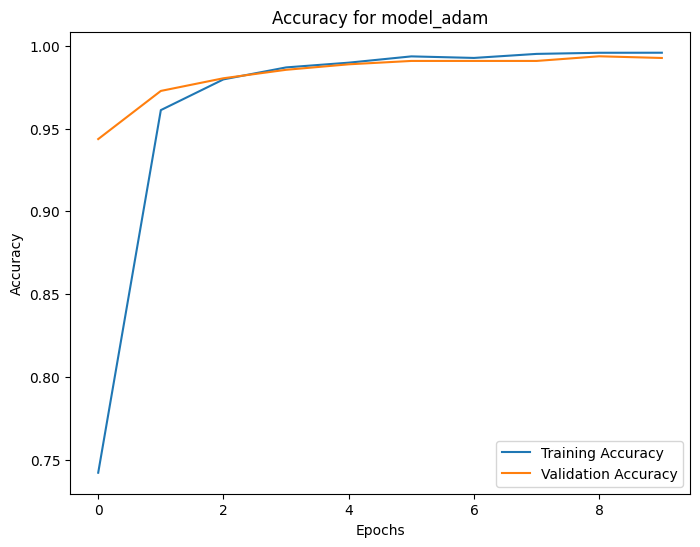

123/123 [==============================] - 1s 11ms/step
Accuracy on the test dataset for model_adam: 0.9429136975455266
Accuracy on the validation dataset for model_adam: 0.9926039275694976
395/395 [==============================] - 5s 12ms/step - loss: 0.3228 - accuracy: 0.9429
Loss on the test dataset for model_adam: [0.32278862595558167, 0.9429137110710144]
123/123 [==============================] - 1s 10ms/step - loss: 0.0456 - accuracy: 0.9926
Loss on the validation dataset for model_adam: [0.04557081311941147, 0.9926038980484009]
Confusion matrix for validation data for adam:
[[ 27   0   0 ...   0   0   0]
 [  0 196   0 ...   0   0   0]
 [  0   0 206 ...   0   0   0]
 ...
 [  0   0   0 ...  41   0   0]
 [  0   0   0 ...   0  28   0]
 [  0   0   0 ...   0   0  23]]

Confusion matrix for test data for adam:
[[ 40  14   0 ...   0   0   0]
 [  0 712   1 ...   0   0   0]
 [  0  17 720 ...   0   0   0]
 ...
 [  0   0   0 ...  87   0   0]
 [  0   0   0 ...   0  46   0]
 [  0   0   0 ...

In [262]:
'''

# Print the model summary
model_adam.summary()

# Train the model with adam
history_adam = model_adam.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history_adam.history['loss'], label='Training Loss')
plt.plot(history_adam.history['val_loss'], label='Validation Loss')
plt.title('Loss for model_adam')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_adam.history['accuracy'], label='Training Accuracy')
plt.plot(history_adam.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for model_adam')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred_adam = np.argmax(model_adam.predict(X_test), axis=-1)

# Make predictions for validation data
val_pred_adam = np.argmax(model_adam.predict(X_val), axis=-1)

# Calculate accuracy for test
accuracy_test_adam = accuracy_score(labels, test_pred_adam)
print("Accuracy on the test dataset for model_adam:", accuracy_test_adam)

# Calculate accuracy for validation
accuracy_val_adam = accuracy_score(y_val, val_pred_adam)
print("Accuracy on the validation dataset for model_adam:", accuracy_val_adam)

# Calculate loss for test
loss_test = model_adam.evaluate(X_test, labels)
print("Loss on the test dataset for model_adam:", loss_test)

# Calculate loss for validation
loss_val = model_adam.evaluate(X_val, y_val)
print("Loss on the validation dataset for model_adam:", loss_val)

# Create confusion matrix for validation data
val_cm_adam = confusion_matrix(y_val, val_pred_adam)

# Create confusion matrix for test data
test_cm_adam = confusion_matrix(labels, test_pred_adam)

print("Confusion matrix for validation data for adam:")
print(val_cm_adam)
print()

print("Confusion matrix for test data for adam:")
print(test_cm_adam)

'''

In [21]:
# Define the model with Gradient Descent optimizer
model_gradient_descent = Sequential()
model_gradient_descent.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model_gradient_descent.add(MaxPooling2D(pool_size=(2, 2)))
model_gradient_descent.add(Conv2D(64, (3, 3), activation='relu'))
model_gradient_descent.add(MaxPooling2D(pool_size=(2, 2)))
model_gradient_descent.add(Flatten())
model_gradient_descent.add(Dense(128, activation='relu'))
model_gradient_descent.add(Dense(classes, activation='softmax'))

# Compile the model with Gradient Descent optimizer
model_gradient_descent.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

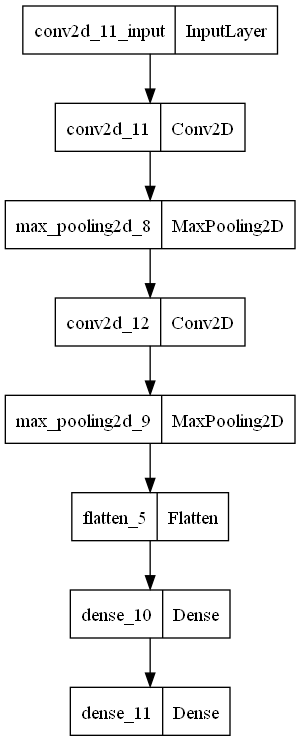

In [22]:
# The model visualization
keras.utils.plot_model(model_gradient_descent)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_36 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_20 (Flatten)        (None, 2304)              0         
                                                                 
 dense_40 (Dense)            (None, 128)             

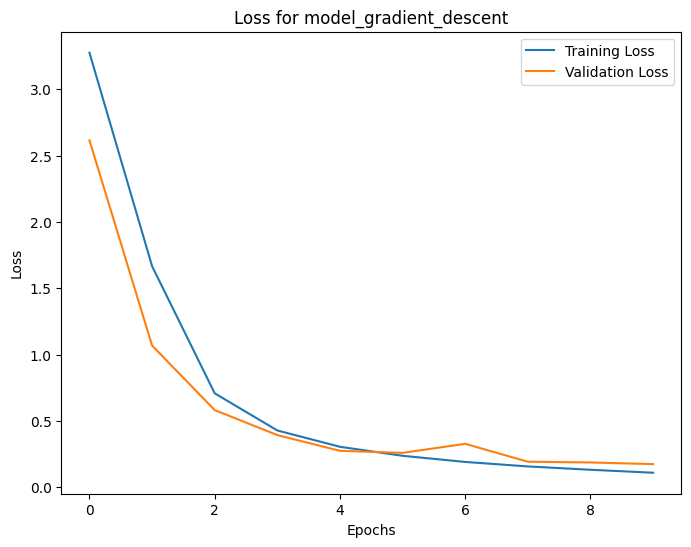

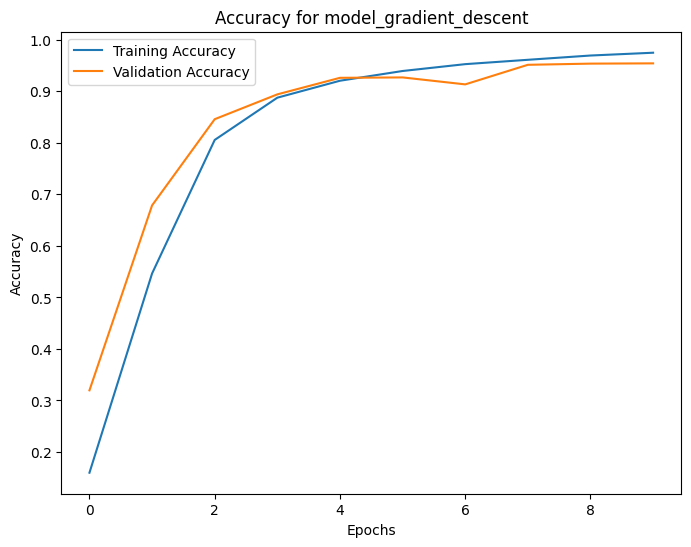

123/123 [==============================] - 1s 10ms/step
Accuracy on the test dataset for model_gradient_descent: 0.8570071258907364
Accuracy on the validation dataset for model_gradient_descent: 0.9543483805151747
395/395 [==============================] - 4s 11ms/step - loss: 0.7722 - accuracy: 0.8570
Loss on the test dataset for model_gradient_descent: [0.7722170948982239, 0.8570071458816528]
123/123 [==============================] - 1s 11ms/step - loss: 0.1734 - accuracy: 0.9543
Loss on the validation dataset for model_gradient_descent: [0.1734468936920166, 0.9543483853340149]
Confusion matrix for validation data for gradient_descent:
[[ 18   1   0 ...   0   0   0]
 [  0 198  13 ...   0   0   0]
 [  0   1 203 ...   0   0   0]
 ...
 [  0   0   0 ...  40   0   0]
 [  0   0   0 ...   0  16   1]
 [  0   0   0 ...   0   0  23]]

Confusion matrix for test data for gradient_descent:
[[ 23  28   0 ...   0   0   0]
 [  4 615  81 ...   0   0   0]
 [  0  14 700 ...   0   0   0]
 ...
 [  0   0

In [273]:
'''

# Print the model summary
model_gradient_descent.summary()

# Train the model with gradient_descent
history_gradient_descent = model_gradient_descent.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history_gradient_descent.history['loss'], label='Training Loss')
plt.plot(history_gradient_descent.history['val_loss'], label='Validation Loss')
plt.title('Loss for model_gradient_descent')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_gradient_descent.history['accuracy'], label='Training Accuracy')
plt.plot(history_gradient_descent.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for model_gradient_descent')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred_gradient_descent = np.argmax(model_gradient_descent.predict(X_test), axis=-1)

# Make predictions for validation data
val_pred_gradient_descent = np.argmax(model_gradient_descent.predict(X_val), axis=-1)

# Calculate accuracy for test
accuracy_test_gradient_descent = accuracy_score(labels, test_pred_gradient_descent)
print("Accuracy on the test dataset for model_gradient_descent:", accuracy_test_gradient_descent)

# Calculate accuracy for validation
accuracy_val_gradient_descent = accuracy_score(y_val, val_pred_gradient_descent)
print("Accuracy on the validation dataset for model_gradient_descent:", accuracy_val_gradient_descent)

# Calculate loss for test
loss_test = model_gradient_descent.evaluate(X_test, labels)
print("Loss on the test dataset for model_gradient_descent:", loss_test)

# Calculate loss for validation
loss_val = model_gradient_descent.evaluate(X_val, y_val)
print("Loss on the validation dataset for model_gradient_descent:", loss_val)

# Create confusion matrix for validation data
val_cm_gradient_descent = confusion_matrix(y_val, val_pred_gradient_descent)

# Create confusion matrix for test data
test_cm_gradient_descent = confusion_matrix(labels, test_pred_gradient_descent)

print("Confusion matrix for validation data for gradient_descent:")
print(val_cm_gradient_descent)
print()

print("Confusion matrix for test data for gradient_descent:")
print(test_cm_gradient_descent)

'''

In [23]:
# Define the model with Sigmoid activation function
model_sigmoid = Sequential()
model_sigmoid.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(30, 30, 3)))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Conv2D(64, (3, 3), activation='sigmoid'))
model_sigmoid.add(MaxPooling2D(pool_size=(2, 2)))
model_sigmoid.add(Flatten())
model_sigmoid.add(Dense(128, activation='sigmoid'))
model_sigmoid.add(Dense(classes, activation='softmax'))

# Compile the model
model_sigmoid.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

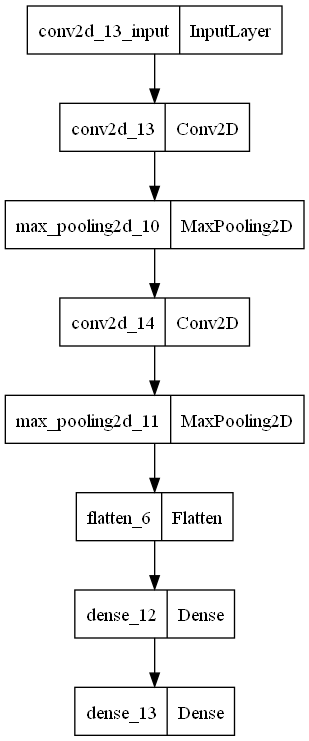

In [24]:
# The model visualization
keras.utils.plot_model(model_sigmoid)

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_21 (Flatten)        (None, 2304)              0         
                                                                 
 dense_42 (Dense)            (None, 128)             

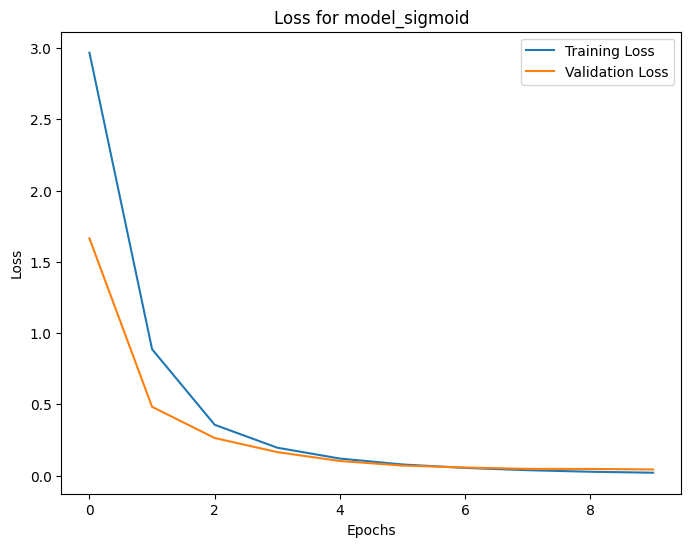

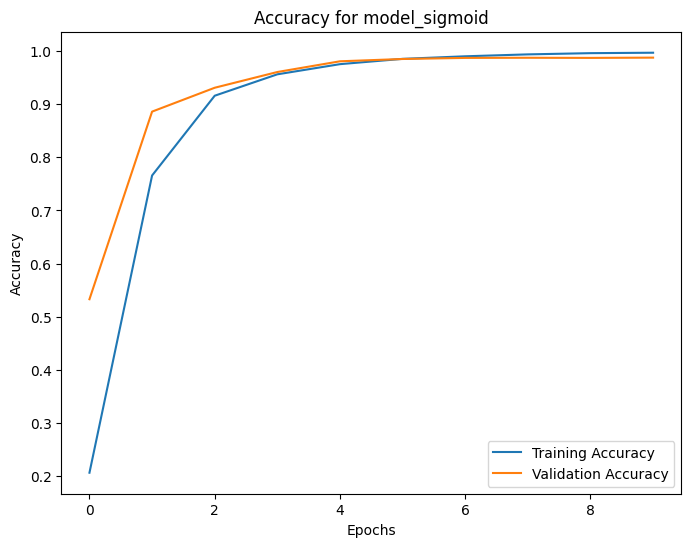

123/123 [==============================] - 1s 10ms/step
Accuracy on the test dataset for model_sigmoid: 0.9144101346001584
Accuracy on the validation dataset for model_sigmoid: 0.9872481509818923
395/395 [==============================] - 5s 11ms/step - loss: 0.3269 - accuracy: 0.9144
Loss on the test dataset for model_sigmoid: [0.3268789052963257, 0.9144101142883301]
123/123 [==============================] - 1s 11ms/step - loss: 0.0427 - accuracy: 0.9872
Loss on the validation dataset for model_sigmoid: [0.04268701374530792, 0.9872481226921082]
Confusion matrix for validation data for sigmoid:
[[ 18   4   0 ...   0   0   0]
 [  0 199   3 ...   0   0   0]
 [  0   0 228 ...   0   0   0]
 ...
 [  0   0   0 ...  30   0   0]
 [  0   0   0 ...   0  22   0]
 [  0   0   0 ...   0   0  24]]

Confusion matrix for test data for sigmoid:
[[ 28  32   0 ...   0   0   0]
 [  3 678  16 ...   0   1   0]
 [  0  21 709 ...   0   0   0]
 ...
 [  0   2   0 ...  83   0   0]
 [  0   0   0 ...   0  44   2]


In [284]:
'''

# Print the model summary
model_sigmoid.summary()

# Train the model with Sigmoid activation function
history_sigmoid = model_sigmoid.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history_sigmoid.history['loss'], label='Training Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss')
plt.title('Loss for model_sigmoid')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_sigmoid.history['accuracy'], label='Training Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for model_sigmoid')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred_sigmoid = np.argmax(model_sigmoid.predict(X_test), axis=-1)

# Get predictions for validation data
val_pred_sigmoid = np.argmax(model_sigmoid.predict(X_val), axis=-1)


# Calculate accuracy for test
accuracy_test_pred_sigmoid = accuracy_score(labels, test_pred_sigmoid)
print("Accuracy on the test dataset for model_sigmoid:", accuracy_test_pred_sigmoid)

# Calculate accuracy for validation
accuracy_val_pred_sigmoid = accuracy_score(y_val, val_pred_sigmoid)
print("Accuracy on the validation dataset for model_sigmoid:", accuracy_val_pred_sigmoid)

# Calculate loss for test
loss_test = model_sigmoid.evaluate(X_test, labels)
print("Loss on the test dataset for model_sigmoid:", loss_test)

# Calculate loss for validation
loss_val = model_sigmoid.evaluate(X_val, y_val)
print("Loss on the validation dataset for model_sigmoid:", loss_val)

# Create confusion matrix for validation data
val_cm_sigmoid = confusion_matrix(y_val, val_pred_sigmoid)

# Create confusion matrix for test data
test_cm_sigmoid = confusion_matrix(labels, test_pred_sigmoid)

print("Confusion matrix for validation data for sigmoid:")
print(val_cm_sigmoid)
print()

print("Confusion matrix for test data for sigmoid:")
print(test_cm_sigmoid)


'''

In [25]:
# Define the model with ReLU activation function
model_relu = Sequential()
model_relu.add(Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model_relu.add(MaxPooling2D(pool_size=(2, 2)))
model_relu.add(Conv2D(64, (3, 3), activation='relu'))
model_relu.add(MaxPooling2D(pool_size=(2, 2)))
model_relu.add(Flatten())
model_relu.add(Dense(128, activation='relu'))
model_relu.add(Dense(classes, activation='softmax'))

# Compile the model
model_relu.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

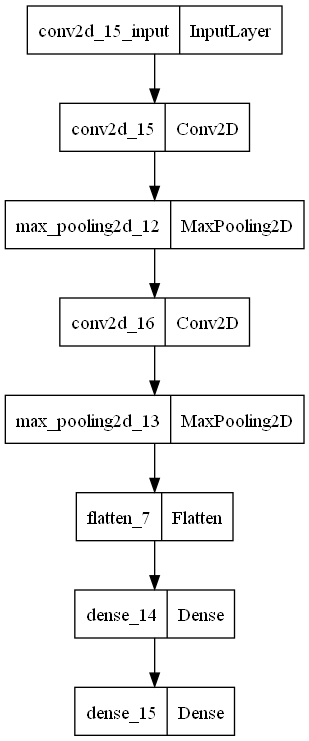

In [26]:
# The model visualization
keras.utils.plot_model(model_relu)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_44 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_45 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_41 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 2304)              0         
                                                                 
 dense_44 (Dense)            (None, 128)             

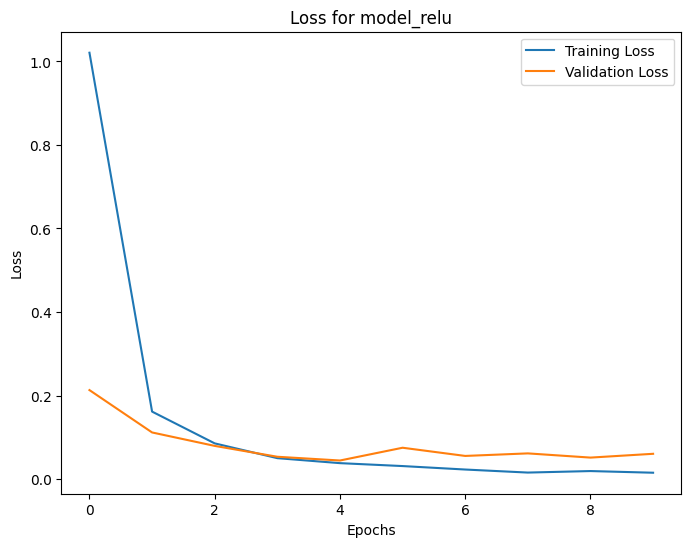

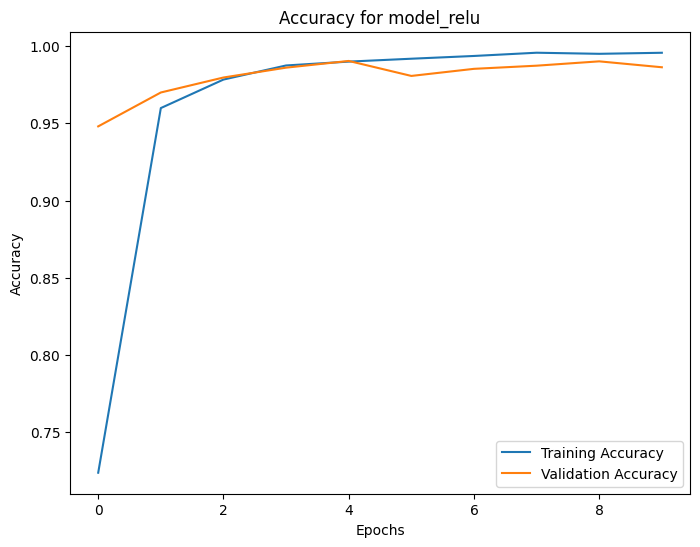

123/123 [==============================] - 1s 11ms/step
Accuracy on the test dataset for model_relu: 0.9288994457640538
Accuracy on the validation dataset for model_relu: 0.9862280030604438
395/395 [==============================] - 5s 11ms/step - loss: 0.4529 - accuracy: 0.9289
Loss on the test dataset for model_relu: [0.4529193341732025, 0.9288994669914246]
123/123 [==============================] - 2s 13ms/step - loss: 0.0605 - accuracy: 0.9862
Loss on the validation dataset for model_relu: [0.06054346263408661, 0.9862279891967773]
Confusion matrix for validation data for relu:
[[ 24   2   0 ...   0   0   0]
 [  0 215   1 ...   0   0   0]
 [  0   1 234 ...   0   0   0]
 ...
 [  0   0   0 ...  24   0   0]
 [  0   0   0 ...   0  25   0]
 [  0   0   0 ...   0   0  25]]

Confusion matrix for test data for relu:
[[ 48   4   0 ...   0   0   0]
 [  1 704  11 ...   0   0   0]
 [  0   5 745 ...   0   0   0]
 ...
 [  0   0   0 ...  72   0   0]
 [  0   0   0 ...   0  41   0]
 [  0   0   0 ... 

In [295]:
'''

# Print the model summary
model_relu.summary()

# Train the model with relu activation function
history_relu = model_relu.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history_relu.history['loss'], label='Training Loss')
plt.plot(history_relu.history['val_loss'], label='Validation Loss')
plt.title('Loss for model_relu')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_relu.history['accuracy'], label='Training Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for model_relu')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred_relu = np.argmax(model_relu.predict(X_test), axis=-1)

# Get predictions for validation data
val_pred_relu = np.argmax(model_relu.predict(X_val), axis=-1)

# Calculate accuracy for test
accuracy_test_pred_relu = accuracy_score(labels, test_pred_relu)
print("Accuracy on the test dataset for model_relu:", accuracy_test_pred_relu)

# Calculate accuracy for validation
accuracy_val_pred_relu = accuracy_score(y_val, val_pred_relu)
print("Accuracy on the validation dataset for model_relu:", accuracy_val_pred_relu)

# Calculate loss for test
loss_test = model_relu.evaluate(X_test, labels)
print("Loss on the test dataset for model_relu:", loss_test)

# Calculate loss for validation
loss_val = model_relu.evaluate(X_val, y_val)
print("Loss on the validation dataset for model_relu:", loss_val)

# Create confusion matrix for validation data
val_cm_relu = confusion_matrix(y_val, val_pred_relu)

# Create confusion matrix for test data
test_cm_relu = confusion_matrix(labels, test_pred_relu)

print("Confusion matrix for validation data for relu:")
print(val_cm_relu)
print()

print("Confusion matrix for test data for relu:")
print(test_cm_relu)


'''

In [27]:
# Define the model with Tanh activation function
model_tanh = Sequential()
model_tanh.add(Conv2D(32, (3, 3), activation='tanh', input_shape=(30, 30, 3)))
model_tanh.add(MaxPooling2D(pool_size=(2, 2)))
model_tanh.add(Conv2D(64, (3, 3), activation='tanh'))
model_tanh.add(MaxPooling2D(pool_size=(2, 2)))
model_tanh.add(Flatten())
model_tanh.add(Dense(128, activation='tanh'))
model_tanh.add(Dense(classes, activation='softmax'))

# Compile the model
model_tanh.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

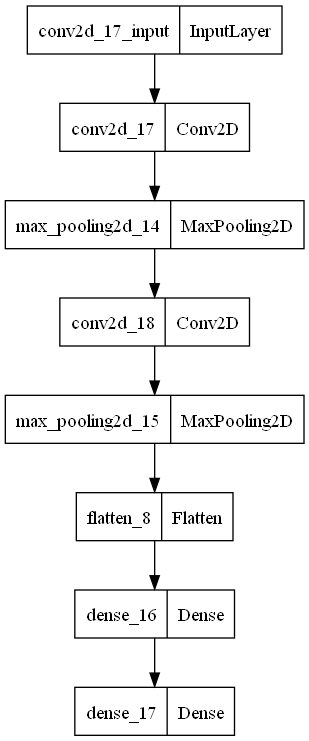

In [28]:
# The model visualization
keras.utils.plot_model(model_tanh)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

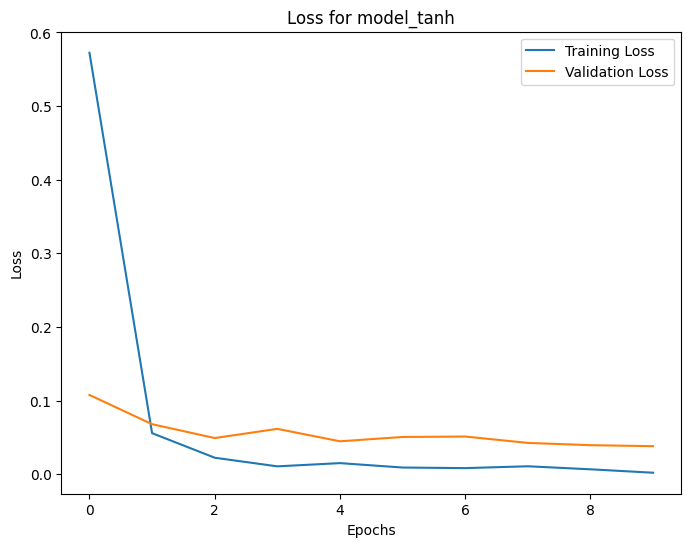

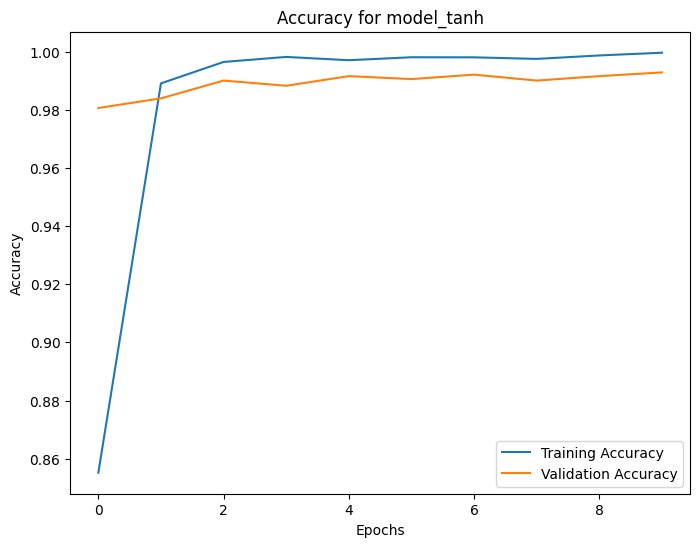

123/123 [==============================] - 1s 11ms/step
Accuracy on the test dataset for model_tanh: 0.9490102929532859
Accuracy on the validation dataset for model_tanh: 0.9928589645498598
395/395 [==============================] - 4s 11ms/step - loss: 0.1960 - accuracy: 0.9490
Loss on the test dataset for model_tanh: [0.19603879749774933, 0.9490103125572205]
123/123 [==============================] - 1s 10ms/step - loss: 0.0381 - accuracy: 0.9929
Loss on the validation dataset for model_tanh: [0.038105256855487823, 0.9928589463233948]
Confusion matrix for validation data for tanh:
[[ 14   0   0 ...   0   0   0]
 [  0 223   0 ...   0   0   0]
 [  0   0 203 ...   0   0   0]
 ...
 [  0   0   0 ...  34   0   0]
 [  0   0   0 ...   0  25   0]
 [  0   0   0 ...   0   0  24]]

Confusion matrix for test data for tanh:
[[ 48   7   0 ...   0   0   0]
 [  0 704   7 ...   0   0   0]
 [  0   2 747 ...   0   0   0]
 ...
 [  0   0   1 ...  78   0   0]
 [  0   0   0 ...   0  43   0]
 [  0   0   0 ..

In [9]:


# Print the model summary
model_tanh.summary()

# Train the model with Tanh activation function
history_tanh = model_tanh.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_val, y_val))


# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history_tanh.history['loss'], label='Training Loss')
plt.plot(history_tanh.history['val_loss'], label='Validation Loss')
plt.title('Loss for model_tanh')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_tanh.history['accuracy'], label='Training Accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for model_tanh')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred_tanh = np.argmax(model_tanh.predict(X_test), axis=-1)

# Get predictions for validation data
val_pred_tanh = np.argmax(model_tanh.predict(X_val), axis=-1)

# Calculate accuracy for test
accuracy_test_pred_tanh = accuracy_score(labels, test_pred_tanh)
print("Accuracy on the test dataset for model_tanh:", accuracy_test_pred_tanh)

# Calculate accuracy for validation
accuracy_val_pred_tanh = accuracy_score(y_val, val_pred_tanh)
print("Accuracy on the validation dataset for model_tanh:", accuracy_val_pred_tanh)

# Calculate loss for test
loss_test = model_tanh.evaluate(X_test, labels)
print("Loss on the test dataset for model_tanh:", loss_test)

# Calculate loss for validation
loss_val = model_tanh.evaluate(X_val, y_val)
print("Loss on the validation dataset for model_tanh:", loss_val)

# Create confusion matrix for validation data
val_cm_tanh = confusion_matrix(y_val, val_pred_tanh)

# Create confusion matrix for test data
test_cm_tanh = confusion_matrix(labels, test_pred_tanh)

print("Confusion matrix for validation data for tanh:")
print(val_cm_tanh)
print()

print("Confusion matrix for test data for tanh:")
print(test_cm_tanh)




In [9]:
# Create an instance of the ImageDataGenerator with data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=10,  # Rotate images randomly by up to 10 degrees
    width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    height_shift_range=0.1,  # Shift images vertically by up to 10% of the height
    shear_range=0.2,  # Shear images by up to 20%
    zoom_range=0.2,  # Zoom in on images by up to 20%
    horizontal_flip=True  # Flip images horizontally
)

# Fit the data generator on the training data
datagen.fit(X_train)

# Define the model with Tanh activation function
model_tanh_aug = Sequential()
model_tanh_aug.add(Conv2D(32, (3, 3), activation='tanh', input_shape=(30, 30, 3)))
model_tanh_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_tanh_aug.add(Conv2D(64, (3, 3), activation='tanh'))
model_tanh_aug.add(MaxPooling2D(pool_size=(2, 2)))
model_tanh_aug.add(Flatten())
model_tanh_aug.add(Dense(128, activation='tanh'))
model_tanh_aug.add(Dense(classes, activation='softmax'))

# Compile the model
model_tanh_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Train the model with data augmentation
history_tanh_aug = model_tanh_aug.fit(datagen.flow(X_train, y_train, batch_size=32),
                              steps_per_epoch=len(X_train) / 32, epochs=10,
                              validation_data=(X_val, y_val))

Epoch 1/10
1102/1102 [==============================] - 40s 35ms/step - loss: 1.5127 - accuracy: 0.5480 - val_loss: 0.6786 - val_accuracy: 0.7842
Epoch 2/10
1102/1102 [==============================] - 40s 36ms/step - loss: 0.7839 - accuracy: 0.7488 - val_loss: 0.3908 - val_accuracy: 0.8819
Epoch 3/10
1102/1102 [==============================] - 39s 36ms/step - loss: 0.5758 - accuracy: 0.8159 - val_loss: 0.2645 - val_accuracy: 0.9237
Epoch 4/10
1102/1102 [==============================] - 40s 36ms/step - loss: 0.4655 - accuracy: 0.8515 - val_loss: 0.2302 - val_accuracy: 0.9281
Epoch 5/10
1102/1102 [==============================] - 40s 36ms/step - loss: 0.3983 - accuracy: 0.8759 - val_loss: 0.1798 - val_accuracy: 0.9475
Epoch 6/10
1102/1102 [==============================] - 39s 36ms/step - loss: 0.3554 - accuracy: 0.8866 - val_loss: 0.1511 - val_accuracy: 0.9546
Epoch 7/10
1102/1102 [==============================] - 39s 36ms/step - loss: 0.3259 - accuracy: 0.8951 - val_loss: 0.1538 -

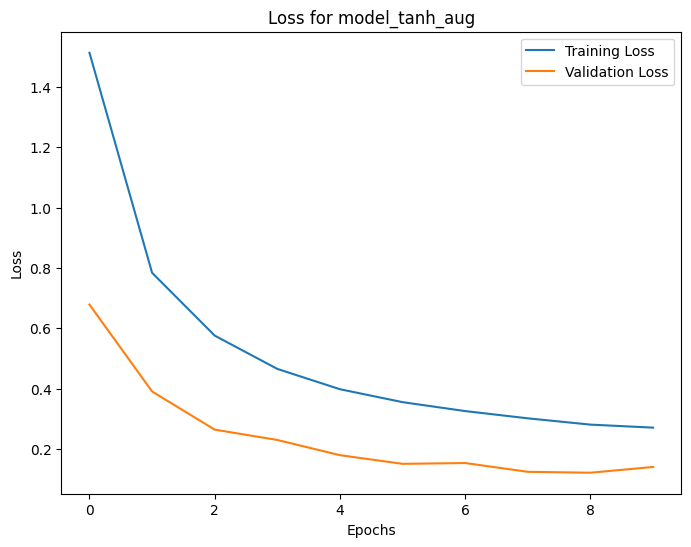

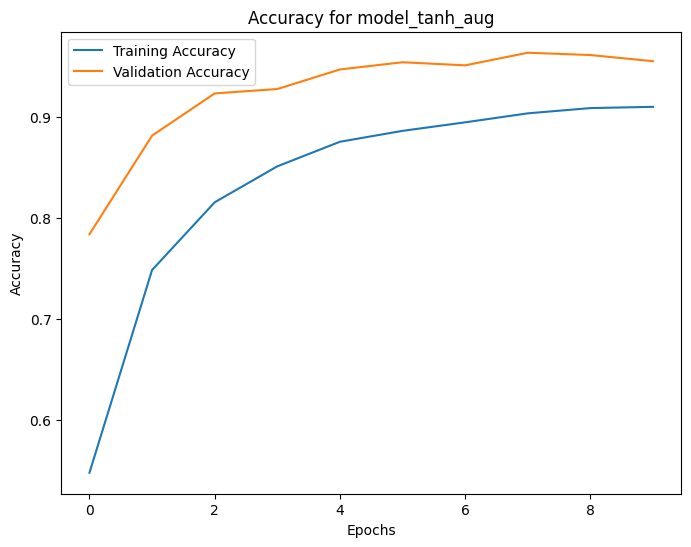

123/123 [==============================] - 1s 10ms/step
Accuracy on the test dataset for model_tanh_aug: 0.8771971496437054
Accuracy on the validation dataset for model_tanh_aug: 0.9556235654169855
395/395 [==============================] - 4s 10ms/step - loss: 0.3886 - accuracy: 0.8772
Loss on the test dataset for model_tanh_aug: [0.3886038362979889, 0.8771971464157104]
123/123 [==============================] - 1s 10ms/step - loss: 0.1408 - accuracy: 0.9556
Loss on the validation dataset for model_tanh_aug: [0.14081034064292908, 0.9556235671043396]
Confusion matrix for validation data for tanh_aug:
[[ 18   0   0 ...   0   0   0]
 [  7 188   4 ...   0   0   0]
 [  1   8 205 ...   0   0   0]
 ...
 [  0   0   0 ...  32   0   0]
 [  0   0   0 ...   0  21   1]
 [  0   0   0 ...   0   0  21]]

Confusion matrix for test data for tanh_aug:
[[ 44   3   8 ...   0   0   0]
 [ 13 642  27 ...   0   0   0]
 [  0  32 692 ...   0   0   0]
 ...
 [  0   0   1 ...  85   0   0]
 [  0   0   0 ...   0  43

In [10]:
# Plot the loss
plt.figure(figsize=(8, 6))
plt.plot(history_tanh_aug.history['loss'], label='Training Loss')
plt.plot(history_tanh_aug.history['val_loss'], label='Validation Loss')
plt.title('Loss for model_tanh_aug')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Plot the accuracy
plt.figure(figsize=(8, 6))
plt.plot(history_tanh_aug.history['accuracy'], label='Training Accuracy')
plt.plot(history_tanh_aug.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy for model_tanh_aug')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


# Load test dataset
y_test = pd.read_csv('C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/Test.csv')

# Add path prefix to "Path" column
y_test["Path"] = 'C:/Users/user/Desktop/German Traffic Sign Recognition Benchmark/' + y_test["Path"]

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data = []

# Load and preprocess images
for img in imgs:
    image = Image.open(img)
    image = image.resize((30, 30))
    data.append(np.array(image) / 255.0)  # Divide each pixel by 255.0

X_test = np.array(data)

# Make predictions for test data
test_pred_tanh_aug = np.argmax(model_tanh_aug.predict(X_test), axis=-1)

# Get predictions for validation data
val_pred_tanh_aug = np.argmax(model_tanh_aug.predict(X_val), axis=-1)

# Calculate accuracy for test
accuracy_test_pred_tanh_aug = accuracy_score(labels, test_pred_tanh_aug)
print("Accuracy on the test dataset for model_tanh_aug:", accuracy_test_pred_tanh_aug)

# Calculate accuracy for validation
accuracy_val_pred_tanh_aug = accuracy_score(y_val, val_pred_tanh_aug)
print("Accuracy on the validation dataset for model_tanh_aug:", accuracy_val_pred_tanh_aug)

# Calculate loss for test
loss_test_aug = model_tanh_aug.evaluate(X_test, labels)
print("Loss on the test dataset for model_tanh_aug:", loss_test_aug)

# Calculate loss for validation
loss_val_aug = model_tanh_aug.evaluate(X_val, y_val)
print("Loss on the validation dataset for model_tanh_aug:", loss_val_aug)

# Create confusion matrix for validation data
val_cm_tanh_aug = confusion_matrix(y_val, val_pred_tanh_aug)

# Create confusion matrix for test data
test_cm_tanh_aug = confusion_matrix(labels, test_pred_tanh_aug)

print("Confusion matrix for validation data for tanh_aug:")
print(val_cm_tanh_aug)
print()

print("Confusion matrix for test data for tanh_aug:")
print(test_cm_tanh_aug)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 128)               2

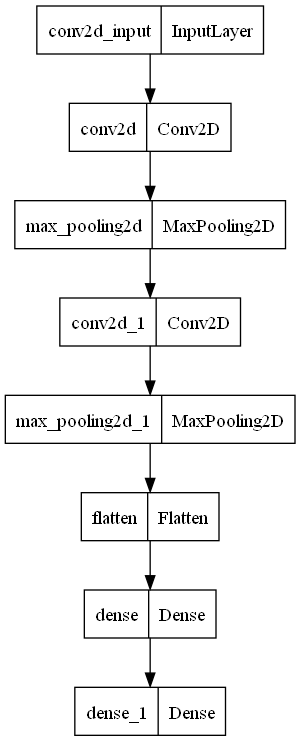

In [12]:
# Print the model summary
model_tanh_aug.summary()

# The model visualization
keras.utils.plot_model(model_tanh_aug)